In [1]:
from google.colab import drive
drive.mount("/content/drive")
#veri dosyalarını eklemek için link

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded=files.upload()
#dosyaları eklemek içi

Saving LoansTrainingSet.csv to LoansTrainingSet.csv


In [3]:

import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
loan=pn.read_csv('LoansTrainingSet.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loan

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [6]:
import missingno as msng


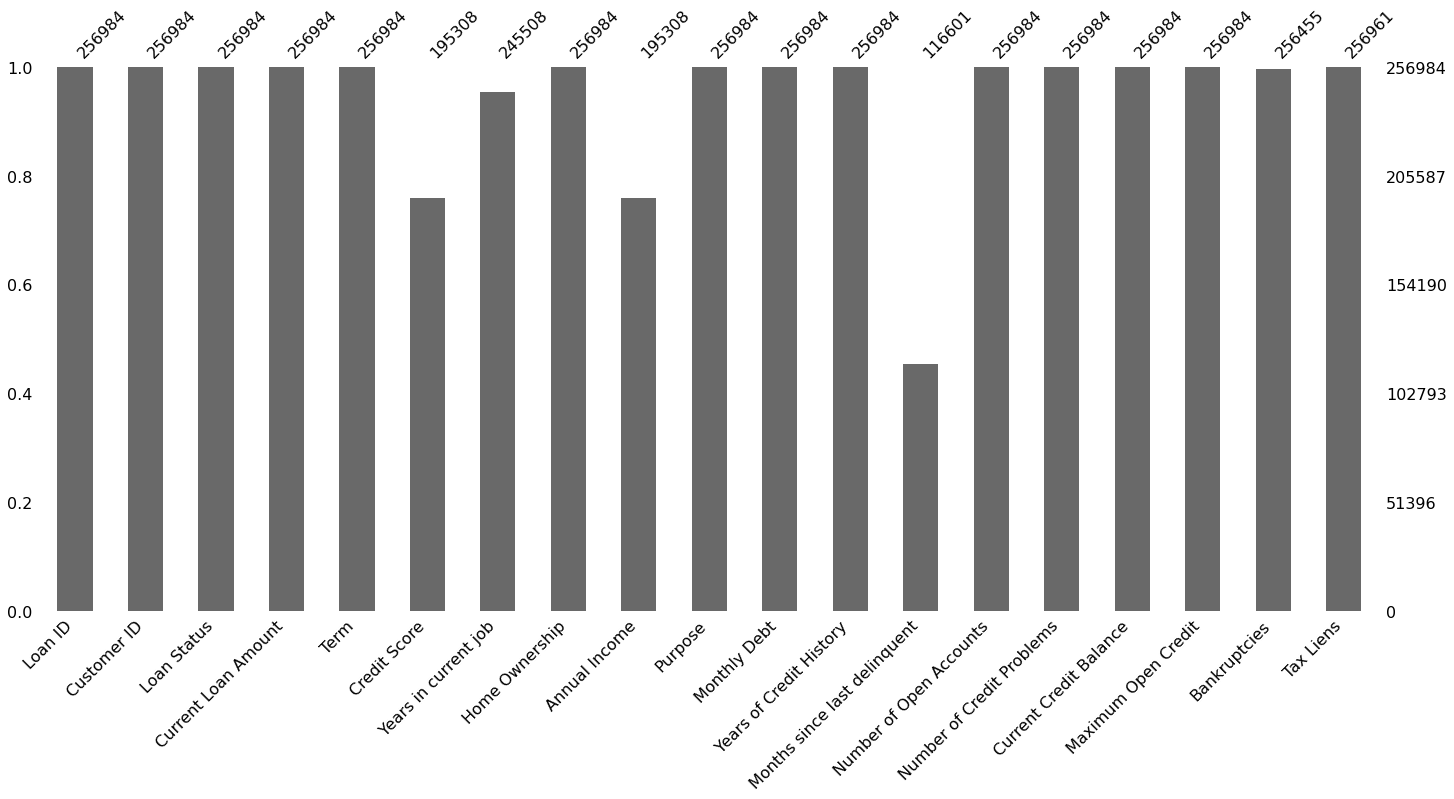

In [7]:
msng.bar(loan) # dolu verileri bütü veriye oranına göre bir grafik çıkarır

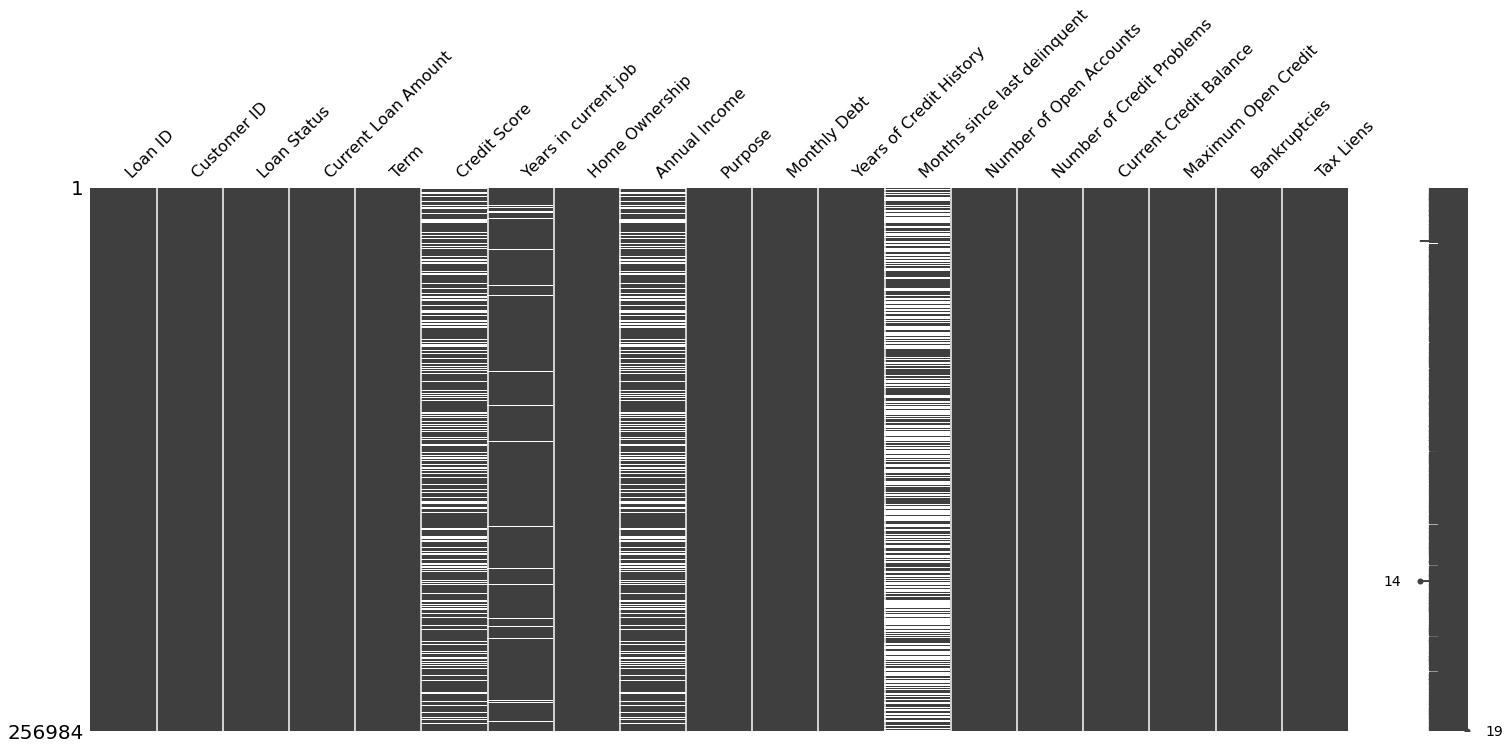

In [8]:
msng.matrix(loan) # tüm veri içinde boş verilerin dağılımının grafiği

In [9]:
# Çok güzel bir ayrıntı farkkettim credit_Score ile annual_income arasında çok güçlü bir bağ var

In [10]:
loan.corr().T # buradan bakınca ise bağ düşük gözüküyor ama ilk başta aklıma şöyle bir ilişki gelmişti
#   ev var mı       kira     
#     nan            nan 
# yani ev bilgisi yoksa kira bilgisinin olmaması normal gibisinden

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [11]:
loan.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0


In [12]:
# dolar işareti silinecek
# objectlere bakılacak arada bir üstünlük ilişkisi var mı diye
# id ler silinecek

In [13]:
loan['Monthly Debt']=loan['Monthly Debt'].apply(lambda x: x.replace('$',''))

In [14]:
loan['Monthly Debt']=loan['Monthly Debt'].apply(lambda x : x.replace('.',''))
loan['Monthly Debt']=loan['Monthly Debt'].apply(lambda x : x.replace(',',''))
loan['Monthly Debt']=loan['Monthly Debt'].astype('int64')

In [15]:
loan.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,58403,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,110604,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,132185,28.8,NaN,5,0,20967,28335,0.0,0.0


In [16]:
Tablo=loan.drop(['Loan ID','Customer ID'],axis=1)

In [17]:
Tablo.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,58403,12.3,41.0,10,0,6760,16056,0.0,0.0
1,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,110604,26.3,NaN,17,0,6262,19149,0.0,0.0


In [18]:
Tablo['Term'].unique()
# uzun vadeli banka için daha iyi faizle para kazanmıs olacak bu yüzden buna 1 değerini atayacağım kısa vadeliye 0 


array(['Short Term', 'Long Term'], dtype=object)

In [19]:
Tablo['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [20]:
Tablo['Loan Status'].unique()
# Charged Off :0
# Fully Paid : 1 
# şeklinde bir ayrım yapabilirim çünkü biri bankanın isteği üzerine iyi diğeri kötü

array(['Fully Paid', 'Charged Off'], dtype=object)

In [21]:
# islem zamanı

In [22]:
Tablo['Term']= Tablo['Term'].apply(lambda x : x.replace('Short Term','0'))
Tablo['Term']= Tablo['Term'].apply(lambda x : x.replace('Long Term','1'))

In [23]:
Tablo['Term'].unique()

array(['0', '1'], dtype=object)

In [24]:
Tablo['Loan Status']= Tablo['Loan Status'].apply(lambda x : x.replace('Charged Off','0'))
Tablo['Loan Status']= Tablo['Loan Status'].apply(lambda x : x.replace('Fully Paid','1'))

In [25]:
Tablo['Loan Status'].unique()

array(['1', '0'], dtype=object)

In [26]:
Tablo['Bankruptcies'].fillna(Tablo['Bankruptcies'].median(),inplace=True)
Tablo['Tax Liens'].fillna(Tablo['Tax Liens'].median(),inplace=True)

In [27]:
Tablo.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,0,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,58403,12.3,41.0,10,0,6760,16056,0.0,0.0
1,1,3441,0,734.0,4 years,Home Mortgage,42269.0,other,110604,26.3,NaN,17,0,6262,19149,0.0,0.0
2,1,21029,0,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,132185,28.8,NaN,5,0,20967,28335,0.0,0.0
3,1,18743,0,747.0,10+ years,Own Home,38072.0,Debt Consolidation,75192,26.2,NaN,9,0,22529,43915,0.0,0.0
4,1,11731,0,746.0,4 years,Rent,50025.0,Debt Consolidation,35518,11.5,NaN,12,0,17391,37081,0.0,0.0


In [28]:
Tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256984 non-null  object 
 1   Current Loan Amount           256984 non-null  int64  
 2   Term                          256984 non-null  object 
 3   Credit Score                  195308 non-null  float64
 4   Years in current job          245508 non-null  object 
 5   Home Ownership                256984 non-null  object 
 6   Annual Income                 195308 non-null  float64
 7   Purpose                       256984 non-null  object 
 8   Monthly Debt                  256984 non-null  int64  
 9   Years of Credit History       256984 non-null  float64
 10  Months since last delinquent  116601 non-null  float64
 11  Number of Open Accounts       256984 non-null  int64  
 12  Number of Credit Problems     256984 non-nul

In [29]:
Tablo[['Loan Status','Term']]=Tablo[['Loan Status','Term']].astype('int64')


In [30]:

Tablo[Tablo['Maximum Open Credit']=='#VALUE!']


,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,0,1470,0,NaN,2 years,Rent,NaN,Debt Consolidation,50634,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,0,1470,0,725.0,2 years,Rent,39200.0,Debt Consolidation,50634,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,0,23897,1,6970.0,7 years,Home Mortgage,49785.0,Home Improvements,130686,13.0,NaN,6,0,0,#VALUE!,0.0,0.0
187513,0,23897,1,697.0,7 years,Home Mortgage,49785.0,Home Improvements,130686,13.0,NaN,6,0,0,#VALUE!,0.0,0.0


In [31]:
Tablo2=Tablo.drop([184662,184663,187512,187513])

In [65]:
Tablo2['Purpose'].unique()
Tablo2['Purpose'].replace('other','Other',inplace=True)

In [33]:
Tablo2['Maximum Open Credit']=Tablo2['Maximum Open Credit'].astype('int64')

In [66]:
Tablo2['Current Loan Amount']=Tablo2['Current Loan Amount'].apply(lambda x : Tablo2['Current Loan Amount'].median() if x >=99999999 else x)

In [73]:
Tablo2[Tablo2['Credit Score']>850]
Tablo2['Credit Score']=Tablo2['Credit Score'].apply(lambda x : x/10 if x >850 else x)

In [74]:
Tablo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256980 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256980 non-null  int64  
 1   Current Loan Amount           256980 non-null  float64
 2   Term                          256980 non-null  int64  
 3   Credit Score                  195305 non-null  float64
 4   Years in current job          245504 non-null  object 
 5   Home Ownership                256980 non-null  object 
 6   Annual Income                 195305 non-null  float64
 7   Purpose                       256980 non-null  object 
 8   Monthly Debt                  256980 non-null  int64  
 9   Years of Credit History       256980 non-null  float64
 10  Months since last delinquent  116599 non-null  float64
 11  Number of Open Accounts       256980 non-null  int64  
 12  Number of Credit Problems     256980 non-nul

In [75]:
# veriler ile oynama bitti simdi regression kullanarak bosları doldurma vakti
Tablo2.to_csv('Tablo.csv')

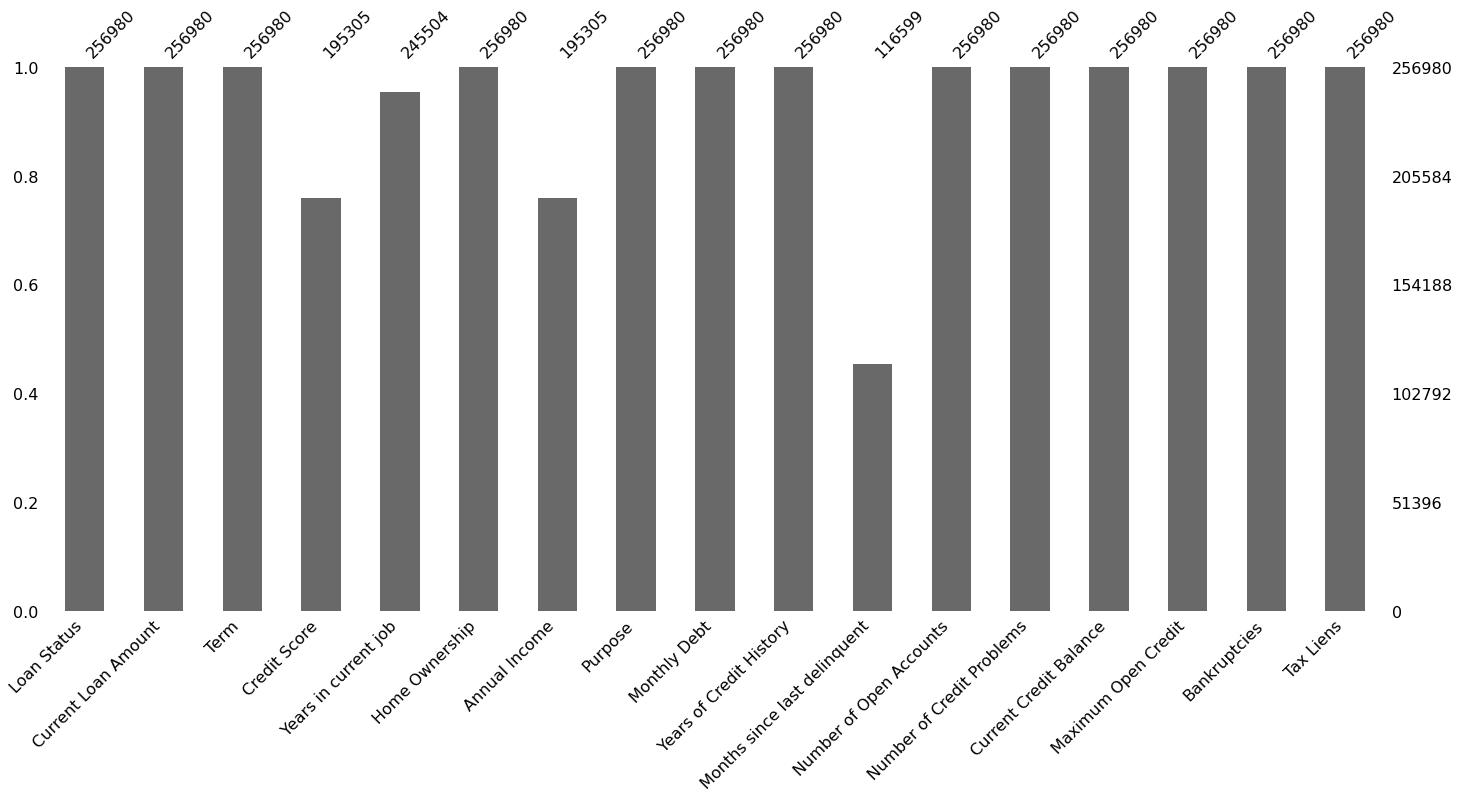

In [76]:
msng.bar(Tablo2)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor,DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [78]:
R=Ridge()
Las=Lasso()
Etr=ExtraTreeRegressor()
Dtr=DecisionTreeRegressor()
Gbr=GradientBoostingRegressor()
Knn=KNeighborsRegressor()

In [79]:
def fitting(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=14)
  algo=[R,Las,Etr,Dtr,Gbr,Knn]
  algo_names=['Ridge','Lasso','ExtraTreeReg','DecisionTreeReg','GradientBoositingReg','KNeighborsReg']
  r2=[]
  mean_s=[]
  mean_a=[]
  for x in algo:
    model=x.fit(x_train,y_train)
    pred=model.predict(x_test)
    r2.append(r2_score(y_test,pred))
    mean_s.append(mean_squared_error(y_test,pred)**0.5)
    mean_a.append(mean_absolute_error(y_test,pred))
  result={'models':algo_names,'R2_scre':r2,'Mean_Square':mean_s,'Mean_Absolute':mean_a}
  res=pn.DataFrame(result)
  return res

In [80]:
#Credit_Score
dolu=Tablo2[Tablo2['Credit Score'].notnull()]
bos=Tablo2[Tablo2['Credit Score'].isnull()]

In [81]:
x=dolu.drop(['Credit Score','Annual Income','Months since last delinquent','Years in current job','Home Ownership','Purpose'],axis=1)
y=dolu['Credit Score']

In [82]:
df=fitting(x,y)

In [83]:
df # birçok yol denedim en iyi tahmini yapan Gradient oldu 

,models,R2_scre,Mean_Square,Mean_Absolute
0,Ridge,0.291947,23.382003,17.419600
1,Lasso,0.272552,23.700084,17.851228
2,ExtraTreeReg,0.010145,27.646147,17.418826
3,DecisionTreeReg,0.054994,27.012580,17.029123
4,GradientBoositingReg,0.377268,21.928025,16.026819
5,KNeighborsReg,0.045282,27.151042,19.893862


In [84]:
x=bos.drop(['Credit Score','Annual Income','Months since last delinquent','Years in current job','Home Ownership','Purpose'],axis=1)
tahmin=Gbr.predict(x)

In [85]:
bos['Credit Score']=tahmin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
Tablo_1=dolu.append(bos)

In [87]:
#Annual Income
dolu=Tablo_1[Tablo_1['Annual Income'].notnull()]
bos=Tablo_1[Tablo_1['Annual Income'].isnull()]

In [88]:
x=dolu.drop(['Annual Income','Months since last delinquent','Years in current job','Home Ownership','Purpose'],axis=1)
y=dolu['Annual Income']

In [89]:
df=fitting(x,y)
df

,models,R2_scre,Mean_Square,Mean_Absolute
0,Ridge,0.290014,46100.739213,22163.141820
1,Lasso,0.290012,46100.802811,22163.113254
2,ExtraTreeReg,-0.076241,56759.404661,25727.790526
3,DecisionTreeReg,-0.819443,73799.297489,26052.449301
4,GradientBoositingReg,0.301059,45740.739393,21281.689338
5,KNeighborsReg,0.198650,48977.222161,23828.206386


In [90]:
x=bos.drop(['Annual Income','Months since last delinquent','Years in current job','Home Ownership','Purpose'],axis=1)
bos['Annual Income']=Gbr.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
Tablo_2=dolu.append(bos)

In [92]:
Tablo_2['Years in current job']=Tablo_2['Years in current job'].str.extract('(\d+)')
Tablo_2['Years in current job']=pn.to_numeric(Tablo_2['Years in current job'],errors='coerce')

In [93]:
#Years in current job
dolu=Tablo_2[Tablo_2['Years in current job'].notnull()]
bos=Tablo_2[Tablo_2['Years in current job'].isnull()]

In [94]:
x=dolu.drop(['Months since last delinquent','Years in current job'],axis=1)
y=dolu['Years in current job']

In [95]:
x=pn.get_dummies(x,drop_first=True)

In [96]:
df=fitting(x,y)
df

,models,R2_scre,Mean_Square,Mean_Absolute
0,Ridge,0.087819,3.341284,2.971245
1,Lasso,0.056938,3.397371,3.053181
2,ExtraTreeReg,-0.440231,4.198449,2.919724
3,DecisionTreeReg,-0.442795,4.202184,2.949150
4,GradientBoositingReg,0.117160,3.287106,2.916089
5,KNeighborsReg,-0.098206,3.666187,3.124811


In [97]:
x=bos.drop(['Months since last delinquent','Years in current job'],axis=1)
x=pn.get_dummies(x,drop_first=True)
bos['Years in current job']=Gbr.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
Tablo_3=dolu.append(bos)

In [99]:
#Months since last delinquent
dolu=Tablo_3[Tablo_3['Months since last delinquent'].notnull()]
bos=Tablo_3[Tablo_3['Months since last delinquent'].isnull()]

In [100]:
x=dolu.drop('Months since last delinquent',axis=1)
y=dolu['Months since last delinquent']

In [101]:
x=pn.get_dummies(x,drop_first=True)

In [102]:
df=fitting(x,y)
df

,models,R2_scre,Mean_Square,Mean_Absolute
0,Ridge,0.027744,21.554193,18.189002
1,Lasso,0.007486,21.777587,18.409659
2,ExtraTreeReg,-0.581210,27.487562,19.718593
3,DecisionTreeReg,-0.595478,27.611298,20.014991
4,GradientBoositingReg,0.046087,21.349902,17.977053
5,KNeighborsReg,-0.143809,23.378581,19.266038


In [103]:
x=bos.drop(['Months since last delinquent'],axis=1)
x=pn.get_dummies(x,drop_first=True)
bos['Months since last delinquent']=Gbr.predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
Tablo_4=dolu.append(bos)

In [106]:
Tablo_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256980 entries, 0 to 256872
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   256980 non-null  int64  
 1   Current Loan Amount           256980 non-null  float64
 2   Term                          256980 non-null  int64  
 3   Credit Score                  256980 non-null  float64
 4   Years in current job          256980 non-null  float64
 5   Home Ownership                256980 non-null  object 
 6   Annual Income                 256980 non-null  float64
 7   Purpose                       256980 non-null  object 
 8   Monthly Debt                  256980 non-null  int64  
 9   Years of Credit History       256980 non-null  float64
 10  Months since last delinquent  256980 non-null  float64
 11  Number of Open Accounts       256980 non-null  int64  
 12  Number of Credit Problems     256980 non-nul

In [108]:
X=Tablo_4.drop('Loan Status',axis=1)
Y=Tablo_4['Loan Status']

In [109]:
X_2=pn.get_dummies(X,drop_first=True)

In [110]:
df=fitting(X_2,Y)

In [111]:
df

,models,R2_scre,Mean_Square,Mean_Absolute
0,Ridge,0.093014,0.442514,0.390602
1,Lasso,0.079795,0.445727,0.403332
2,ExtraTreeReg,-0.022888,0.469938,0.220842
3,DecisionTreeReg,0.059012,0.450732,0.203160
4,GradientBoositingReg,0.221062,0.410089,0.345396
5,KNeighborsReg,0.056091,0.451432,0.344758


In [114]:
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score,accuracy_score

Etrc=ExtraTreeClassifier()
Dtc=DecisionTreeClassifier()
Knnc=KNeighborsClassifier()
Ber=BernoulliNB()
Gaus=GaussianNB()
Gbc=GradientBoostingClassifier()

In [117]:
def fittingclass(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=14)
  algo=[Etrc,Dtc,Knnc,Ber,Gaus,Gbc]
  algo_names=['ExtraTreeClass','DecisionTreeClass','KNeighboursClass','Bernoulli','Gaussian','GradientBoostingClass']
  f1=[]
  accu=[]
  for x in algo:
    model=x.fit(x_train,y_train)
    pred=model.predict(x_test)
    f1.append(f1_score(y_test,pred))
    accu.append(accuracy_score(y_test,pred))
  result={'models':algo_names,'f1_score':f1,'Accuracy':accu}
  res=pn.DataFrame(result)
  return res

In [118]:
df=fittingclass(X_2,Y)

In [119]:
df

,models,f1_score,Accuracy
0,ExtraTreeClass,0.820746,0.764106
1,DecisionTreeClass,0.845079,0.795486
2,KNeighboursClass,0.788773,0.699650
3,Bernoulli,0.806474,0.689906
4,Gaussian,0.094639,0.345412
5,GradientBoostingClass,0.828467,0.750175


In [120]:
#ortalama sonuçlar ile karşınızdayım

In [ ]:
#Derin öğrenmeye daha yüksek sonuç almak için başlıyorum 

In [121]:
x_train,x_test,y_train,y_test=train_test_split(X_2,Y,test_size=0.25,random_state=14)

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [124]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [125]:
x_test.shape,x_train.shape

((64245, 25), (192735, 25))

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [157]:
model=Sequential()

model.add(Dense(40,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(20,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(20,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="mse",optimizer="adam")

In [158]:
earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [159]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=150,callbacks=[earlyStopping])

Epoch 1/150
6023/6023 [==============================] - 12s 2ms/step - loss: 0.2204 - val_loss: 0.2100
Epoch 2/150
6023/6023 [==============================] - 11s 2ms/step - loss: 0.2100 - val_loss: 0.2047
Epoch 3/150
6023/6023 [==============================] - 12s 2ms/step - loss: 0.2066 - val_loss: 0.2024
Epoch 4/150
6023/6023 [==============================] - 12s 2ms/step - loss: 0.2052 - val_loss: 0.1993
Epoch 5/150
6023/6023 [==============================] - 11s 2ms/step - loss: 0.2039 - val_loss: 0.1971
Epoch 6/150
6023/6023 [==============================] - 11s 2ms/step - loss: 0.2029 - val_loss: 0.1977
Epoch 7/150
6023/6023 [==============================] - 11s 2ms/step - loss: 0.2028 - val_loss: 0.1962
Epoch 8/150
6023/6023 [==============================] - 11s 2ms/step - loss: 0.2022 - val_loss: 0.1974
Epoch 9/150
6023/6023 [==============================] - 12s 2ms/step - loss: 0.2029 - val_loss: 0.1975
Epoch 10/150
6023/6023 [==============================] - 11s 2m

In [160]:
kayip=pn.DataFrame(model.history.history)

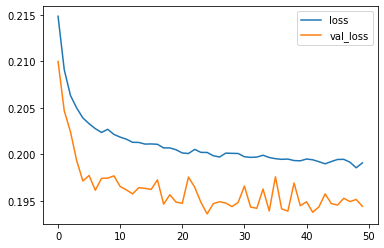

In [161]:
kayip.plot()

In [162]:
pre=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [163]:
pre

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [164]:
accuracy_score(y_test,pre)

0.6875554517861312

In [165]:

f1_score(y_test,pre)

0.8133525500953089

In [ ]:
# bayağı oynadım ama 81 i geçemedim